In [1]:
import scanpy as sc
import mudata as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys
sys.path.append('../')

from latentcor import get_tps, latentcor
from utils.gglasso_pipeline import gg_lasso_network_analysis
from scipy.linalg import svd

np.random.seed(42)

In [2]:
ec_adata = sc.read_h5ad(filename='../data/ec_prepro.h5ad')
sc.pp.filter_genes(ec_adata, min_cells=1)
ec_adata

AnnData object with n_obs × n_vars = 5964 × 3379
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_genes', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'var_counts'
    uns: 'genes_match', 'protein_match', 'unmatch_genes'
    layers: 'counts', 'counts_scaled', 'sqrt_counts', 'sqrt_counts_scaled'

In [3]:
tps = get_tps(ec_adata.layers['counts'].A)

ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by eith

In [4]:
np.unique(tps, return_counts=True)

(array(['bin', 'ter', 'tru'], dtype='<U3'),
 array([2985,  315,   79], dtype=int64))

In [5]:
np.unique(ec_adata.X.A[:,0], return_counts=True)

(array([0., 1.], dtype=float32), array([5962,    2], dtype=int64))

In [6]:
sc.pp.highly_variable_genes(ec_adata, n_top_genes=200)
ec_adata_hvg = ec_adata[:, ec_adata.var['highly_variable']].copy()
ec_adata_hvg

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


AnnData object with n_obs × n_vars = 5964 × 200
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_genes', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'var_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'genes_match', 'protein_match', 'unmatch_genes', 'hvg'
    layers: 'counts', 'counts_scaled', 'sqrt_counts', 'sqrt_counts_scaled'

In [7]:
tps_hvg = get_tps(ec_adata_hvg.layers['counts'].A)

ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by eith

In [8]:
np.unique(tps_hvg, return_counts=True)

(array(['bin', 'ter', 'tru'], dtype='<U3'),
 array([  5, 150,  45], dtype=int64))

In [9]:
tps_hvg

array(['ter', 'ter', 'ter', 'tru', 'ter', 'ter', 'ter', 'ter', 'ter',
       'tru', 'ter', 'tru', 'ter', 'ter', 'tru', 'ter', 'ter', 'tru',
       'tru', 'ter', 'ter', 'ter', 'ter', 'ter', 'tru', 'ter', 'ter',
       'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'tru', 'ter', 'ter',
       'ter', 'ter', 'bin', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter',
       'tru', 'tru', 'ter', 'tru', 'ter', 'ter', 'ter', 'ter', 'tru',
       'tru', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter',
       'ter', 'ter', 'ter', 'bin', 'ter', 'bin', 'ter', 'tru', 'ter',
       'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'tru',
       'ter', 'ter', 'ter', 'ter', 'tru', 'ter', 'ter', 'tru', 'ter',
       'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter',
       'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'tru',
       'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'tru',
       'ter', 'ter', 'ter', 'ter', 'ter', 'ter', 'tru', 'ter', 'ter',
       'ter', 'ter',

Looking at the last gene that latentcor estimated as bin: only zeros except one count of two

In [10]:
np.unique(ec_adata_hvg.X.A[:,-1], return_counts=True)

(array([0., 2.], dtype=float32), array([5963,    1], dtype=int64))

In [11]:
np.where(tps_hvg == 'bin')

(array([ 38,  66,  68, 135, 199], dtype=int64),)

excluding bin genes

In [12]:
ec_adata_hvg = ec_adata_hvg[:,tps_hvg != 'bin']

In [13]:
ec_adata_hvg

View of AnnData object with n_obs × n_vars = 5964 × 195
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_genes', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'var_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'genes_match', 'protein_match', 'unmatch_genes', 'hvg'
    layers: 'counts', 'counts_scaled', 'sqrt_counts', 'sqrt_counts_scaled'

### treating all vars as truncated

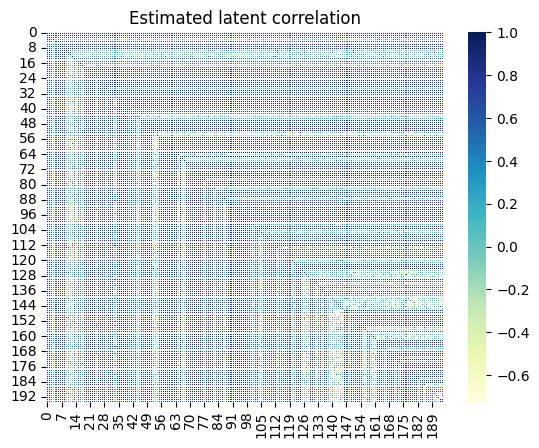

In [14]:
tps_hvg = ['tru' for i in range(ec_adata_hvg.shape[1])]
est_hvg_nobin = latentcor(ec_adata_hvg.layers['counts'].A, tps=tps_hvg, method='approx', use_nearPD=False, nu=0.001, showplot=True)

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


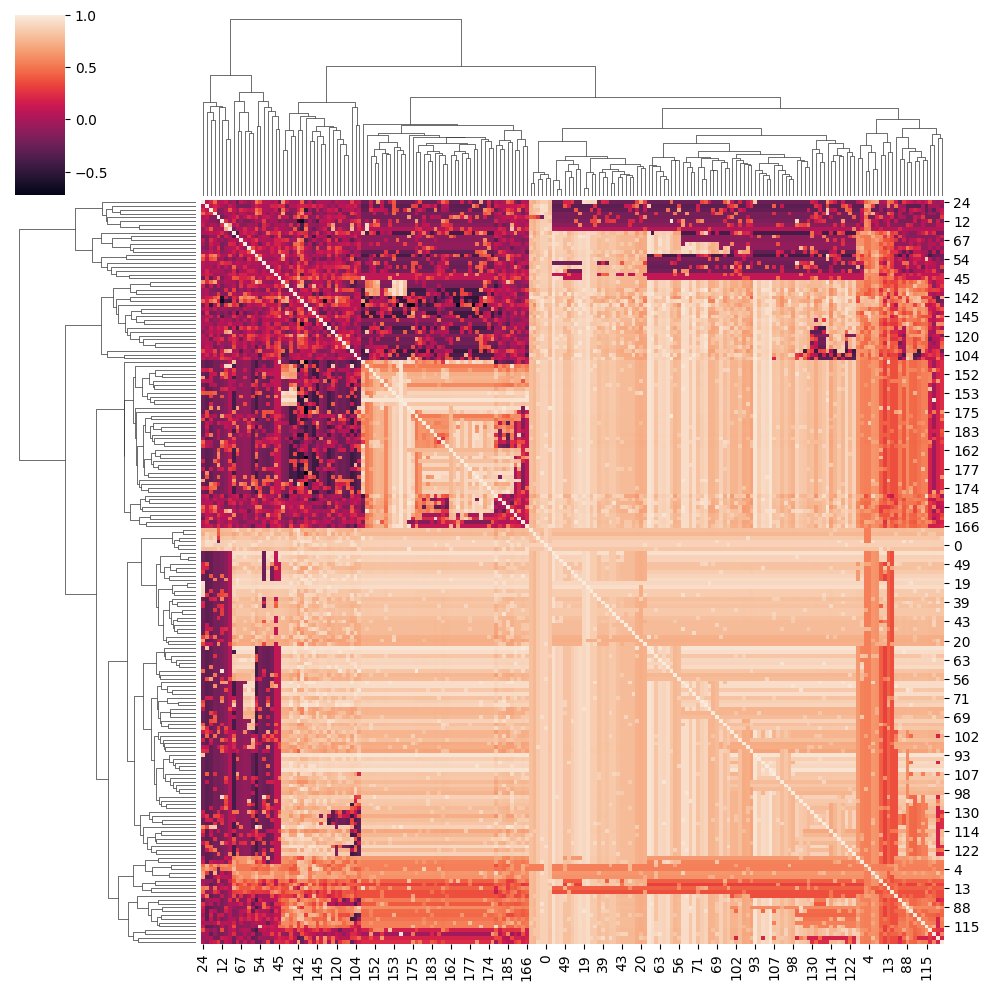

In [15]:
sns.clustermap(est_hvg_nobin['R'])

In [17]:
est_hvg_nobin['R']

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,1.000000,0.881052,0.877683,0.860842,0.877683,0.880715,0.881220,0.880378,0.881725,0.869094,...,0.852082,0.877683,0.933898,0.874652,0.878525,0.928638,0.919400,0.859160,0.881726,0.933803
1,0.881052,1.000000,0.821522,0.873988,0.821522,0.826071,0.826577,0.825565,0.826577,0.879952,...,0.783107,0.821522,0.819753,0.816974,0.822786,0.867643,0.754805,0.912924,0.826579,0.819753
2,0.877683,0.821522,1.000000,0.473189,0.612758,0.540722,0.540728,0.540719,0.540733,0.596698,...,0.438077,0.540690,0.535965,0.528539,0.540699,0.623512,0.362478,0.466446,0.540744,0.535965
3,0.860842,0.873988,0.473189,1.000000,-0.206451,0.422737,0.270526,0.388844,-0.206036,-0.094610,...,0.117346,0.158588,0.013473,-0.206763,0.058450,0.057615,-0.040497,0.085609,-0.205933,-0.206572
4,0.877683,0.821522,0.612758,-0.206451,1.000000,0.540722,0.540728,0.540719,0.540733,0.506263,...,0.562930,0.866868,0.535965,0.528539,0.755296,0.623512,0.487972,0.466446,0.540744,0.535965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.928638,0.867643,0.623512,0.057615,0.623512,0.748616,0.882872,0.714122,0.852082,0.693085,...,0.265898,0.563316,0.516995,0.254178,0.524359,1.000000,-0.220443,-0.304321,-0.300736,0.258281
191,0.919400,0.754805,0.362478,-0.040497,0.487972,0.715591,0.774410,0.676373,0.922392,-0.239942,...,0.057523,0.586943,0.225064,0.413647,0.729195,-0.220443,1.000000,-0.137113,-0.480537,0.364295
192,0.859160,0.912924,0.466446,0.085609,0.466446,0.761009,0.810086,0.870738,0.859160,-0.223160,...,-0.025612,0.466446,0.351850,0.171720,0.650663,-0.304321,-0.137113,1.000000,-0.222025,-0.222706
193,0.881726,0.826579,0.540744,-0.205933,0.540744,0.798753,0.972704,0.770758,0.881726,-0.128181,...,-0.300736,0.540744,0.436725,0.269100,0.613781,-0.300736,-0.480537,-0.222025,1.000000,0.961627


Check whether R is pos def. 

In [23]:
s = svd(est_hvg_nobin['R'], compute_uv=False)
assert np.all(s>0)

In [43]:
ggl_est_hvg_nobin = gg_lasso_network_analysis(N=ec_adata_hvg.shape[0], estimate=est_hvg_nobin)
ggl_est_hvg_nobin.create_problem(S_col='R')
ggl_est_hvg_nobin.model_selection(lambda1_range=np.logspace(0, -3, 300))

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 14 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 13 iterations with status: optimal.
ADMM terminated after 73 iterations with status: optimal.
ADMM terminated after 13 iterations with status: optimal.
ADMM terminated after 82 iterations with status: optimal.
ADMM terminated after 85 iterations with status: optimal.
ADMM terminated after 88 iterations with status: optimal.
ADMM terminated after 108 iterations with status: optimal.
ADMM terminated after 113 iterations with status: optimal.
ADMM terminated after 117 iterations with status: optimal.
ADMM terminated after 121 iterations with status: optimal.
ADMM terminated after 123 iterations with status: optimal.
ADMM terminated after 125 iterati

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.6611320461379364e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal opti

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 6.27613189863041e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal opti

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.52587890625e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.52587890625e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.1444091796875e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.1444091796875e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.621246337890625e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.621246337890625e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 3.0517578125e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 3.0517578125e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 2.288818359375e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 2.288818359375e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.71661376953125e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.71661376953125e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 6.103515625e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 6.103515625e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 4.57763671875e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 4.57763671875e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 7.295608520507812e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 7.295608520507812e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 0.0001220703125.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 0.0001220703125.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 7.2479248046875e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 7.2479248046875e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 9.1552734375e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 9.1552734375e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 0.00012969970703125.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 0.00012969970703125.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 0.000152587890625.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 0.000152587890625.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 0.000244140625.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 0.000244140625.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 0.00018310546875.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 0.00018310546875.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
{'lambda1': 0.1139872266616052, 'mu1': 0}


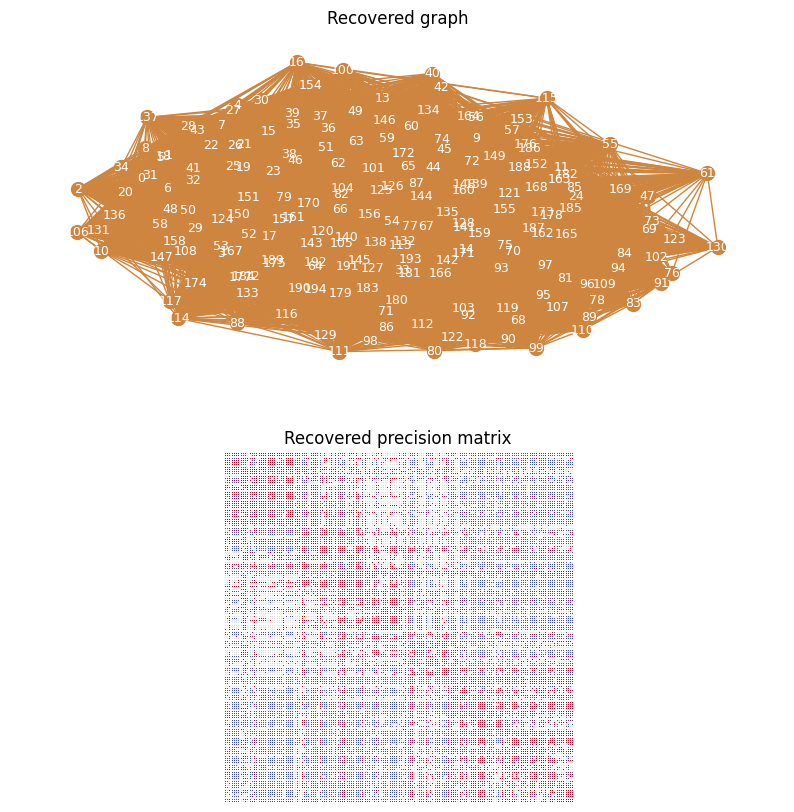

In [46]:
ggl_est_hvg_nobin.plot_graph_and_percision_matrix(fig_size=(10,10))

### using get tps for tps

ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by eith

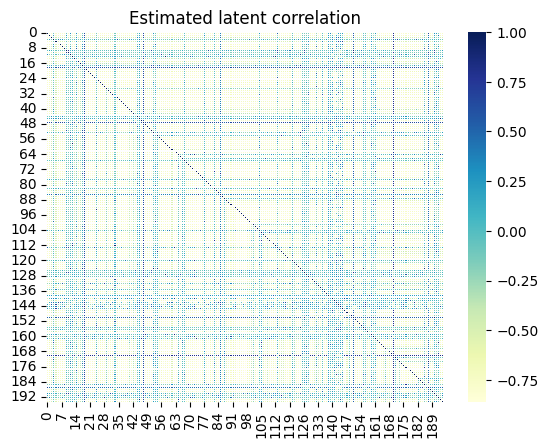

In [48]:
tps_hvg = get_tps(ec_adata_hvg.layers['counts'].A)
est_hvg_nobin = latentcor(ec_adata_hvg.layers['counts'].A, tps=tps_hvg, method='approx', use_nearPD=False, nu=0.001, showplot=True)

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


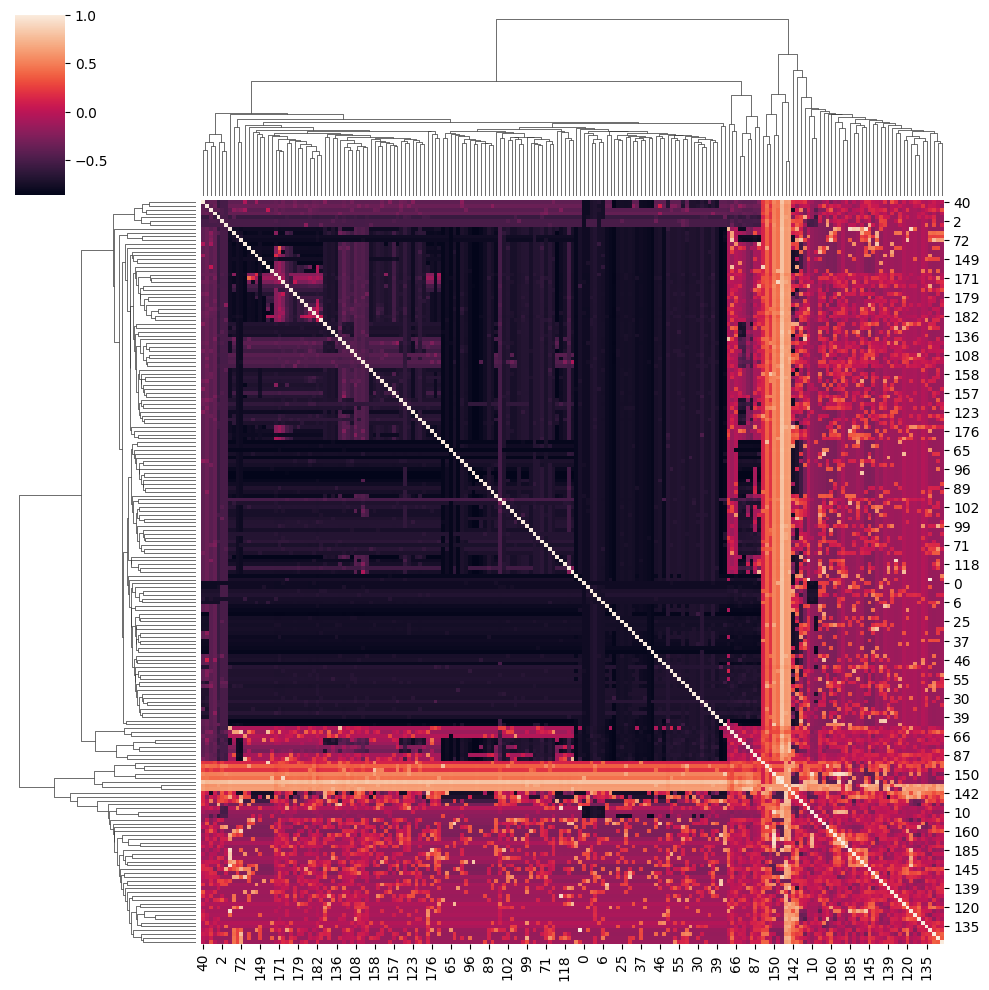

In [49]:
sns.clustermap(est_hvg_nobin['R'])

In [54]:
s = svd(est_hvg_nobin['R'], compute_uv=False)
assert np.any(s>0)

In [55]:
ggl_est_hvg_nobin_tps = gg_lasso_network_analysis(N=ec_adata_hvg.shape[0], estimate=est_hvg_nobin)
ggl_est_hvg_nobin_tps.create_problem(S_col='R')
ggl_est_hvg_nobin_tps.model_selection(lambda1_range=np.logspace(0, -3, 100))

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 28 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 24 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 24 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 28 iterations with status: optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: 

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.52587890625e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.52587890625e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 1.9073486328125e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 1.9073486328125e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 3.0517578125e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 3.0517578125e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 6.103515625e-05.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 6.103515625e-05.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")


ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
{'lambda1': 0.657933224657568, 'mu1': 0}


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:215: UserWarning: Omega variable is not symmetric, largest deviation is 0.0001220703125.
  warnings.warn(f"Omega variable is not symmetric, largest deviation is {abs((Omega_t).T - Omega_t).max()}.")
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\gglasso\solver\single_admm_solver.py:218: UserWarning: Theta variable is not symmetric, largest deviation is 0.0001220703125.
  warnings.warn(f"Theta variable is not symmetric, largest deviation is {abs((Theta_t).T - Theta_t).max()}.")


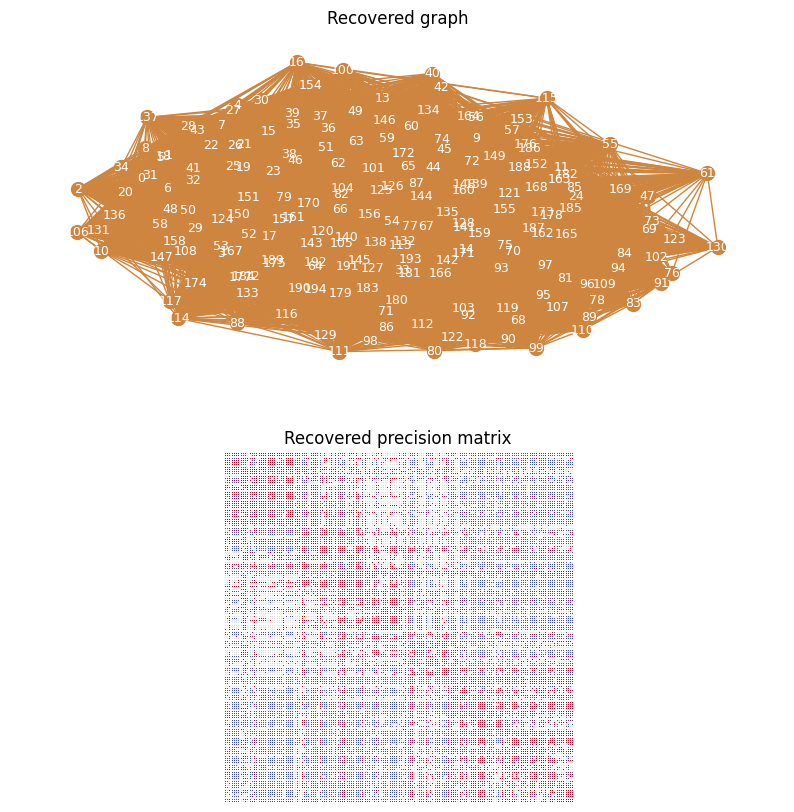

In [56]:
ggl_est_hvg_nobin.plot_graph_and_percision_matrix(fig_size=(10,10))